In [4]:
import numpy as np
import timeit
import time
from PIL import Image
from numba import jit
from instapy import python_filters
from instapy import numpy_filters
from instapy import numba_filters
from instapy import cython_filters
from instapy.python_filters import python_color2gray, python_color2sepia
filename = "test/rain.jpg"
pixels = np.asarray(Image.open(filename))

In [8]:
sepia_image = numpy_filters.numpy_color2sepia(pixels, 0.5)

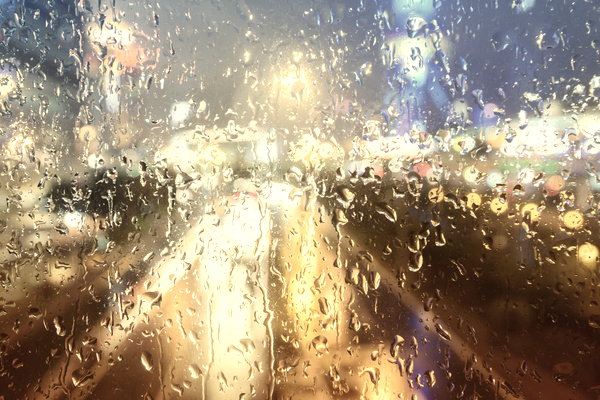

In [9]:
Image.fromarray(sepia_image)

In [ ]:

sepia_image = np.empty_like(pixels)

# define sepia matrix (optional: with `k` tuning parameter for bonus task 13)
sepia_matrix = np.array([
    [ 0.393, 0.769, 0.189],
    [ 0.349, 0.686, 0.168],
    [ 0.272, 0.534, 0.131],
])

# HINT: For version without adaptive sepia filter, use the same matrix as in the pure python implementation
# use Einstein sum to apply pixel transform matrix
# Apply the matrix filter
sepia_image = pixels.dot(sepia_matrix.T)
#for i in range(sepia_image.shape[0]):
#    for j in range(sepia_image.shape[1]):
#        for p in range(3):
#            if sepia_image[i][j][p] >255:
#                print(sepia_image[i][j][p])
#sepia_image[np.where(sepia_image > 255)] = 255

In [ ]:
np.where(sepia_image > 255)

In [ ]:
sepia_image= numpy_filters.numpy_color2sepia(pixels)

# assert uniform r,g,b values
np.random.seed(1)
# expected random pixel value
sepia_matrix = np.array([
    [ 0.393, 0.769, 0.189],
    [ 0.349, 0.686, 0.168],
    [ 0.272, 0.534, 0.131],
])
H = sepia_image.shape[0]
W = sepia_image.shape[1]
for n in range(5):
    i = np.random.randint(H)
    j = np.random.randint(W)
    expected_value = pixels[i,j,:].dot(sepia_matrix.T)
    expected_value[np.where(expected_value > 255)] = 255
    expected_value=expected_value.astype("uint8")
    print(expected_value)


In [ ]:
import instapy

In [ ]:
%load_ext Cython

In [16]:
sepia_image = numpy_filters.numpy_color2sepia(pixels, k=0)

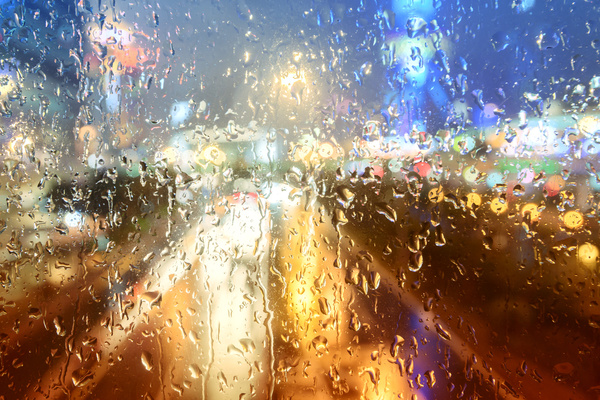

In [17]:
Image.fromarray(sepia_image)

In [ ]:
gray_image = python_color2gray(pixels)

In [ ]:
sepia = python_filters.python_color2sepia(pixels)

In [ ]:
expected_value = pixels[i, j, :] @ np.array([0.21, 0.72, 0.07])

In [ ]:
sepia_matrix = np.array([
    [ 0.393, 0.769, 0.189],
    [ 0.349, 0.686, 0.168],
    [ 0.272, 0.534, 0.131],
])

In [ ]:
H = sepia.shape[0]
W = sepia.shape[1]
i = np.random.randint(H)
j = np.random.randint(W)
expected_value = pixels[i,j,:].dot(sepia_matrix.T).astype("uint8")
expected_value[np.where(expected_value > 255)] = 255

In [ ]:
np.array_equal(sepia[i,j,:],expected_value)

In [ ]:
expected_value

In [ ]:
sepia[i,j,:]

In [ ]:
print(i,j)

In [ ]:
pixels[209,264,:].dot(sepia_matrix.T).astype("uint8")

In [ ]:
sepia[209,264,:]

In [ ]:
image = Image.fromarray(pixels)

In [ ]:
image

In [ ]:
#%timeit gray_image_py= python_filters.python_color2gray(pixels)
#%timeit gray_image_numpy= numpy_filters.numpy_color2gray(pixels)
#%timeit gray_image_numba = numba_filters.numba_color2gray(pixels)
#%timeit gray_image_cython= cython_filters.cython_color2gray(pixels)
#gray_image_numba= numba_filters.numba_color2gray(pixels)
#gray_image_py= python_filters.python_color2gray(pixels)
#gray_image_numpy= numpy_filters.numpy_color2gray(pixels)
#gray_image_cython= cython_filters.cython_color2gray(pixels)
grayscale_image_python = Image.fromarray(gray_image_py)
grayscale_image_numpy = Image.fromarray(gray_image_numpy)
#grayscale_image_numba = Image.fromarray(gray_image_numba)
#grayscale_image_cython = Image.fromarray(gray_image_cython)

In [ ]:
import numpy.testing as nt


In [ ]:
gray_image_py

In [ ]:
t0 = time.perf_counter()
instapy.python_filters.python_color2gray(pixels)
t1 = time.perf_counter()
print("CPU time: {:.4} s".format(t1-t0))

In [ ]:
instapy.get_filter("color2sepia","numba")

In [ ]:
filter_names = ["color2gray", "color2sepia"]
calls = 3
f = open("timing-report.txt", "a")
for filter_name in filter_names:
    # get the reference filter function
    t0 = time.perf_counter()
    reference_filter = instapy.get_filter(filter_name,"python")
    t1 = time.perf_counter()
    # time the reference implementation
    reference_time = t1-t0
    f.write(
        f"Reference (pure Python) filter time {filter_name}: {reference_time:.3}s ({calls=})\n"
    )
    print(
        f"Reference (pure Python) filter time {filter_name}: {reference_time:.3}s ({calls=})"
    )
    # iterate through the implementations
    implementations = ["numpy", "numba", "cython"]
    for implementation in implementations:
        t0 = time.perf_counter()
        filter = instapy.get_filter(filter_name,implementation)
        t1 = time.perf_counter()
        # time the filter
        filter_time = t1-t0
        # compare the reference time to the optimized time
        speedup = float(reference_time/filter_time)
        f.write(
        f"Reference (pure Python) filter time {filter_name}: {reference_time:.3}s ({calls=})\n"
    )
        print(
            f"Timing: {implementation} {filter_name}: {filter_time:.3}s ({speedup=:.2f}x)"
        )
f.close()

In [ ]:
t0 = time.perf_counter()
gray_image = np.empty_like(pixels)
red   = pixels[:,:,0]
blue  = pixels[:,:,1]
green = pixels[:,:,2]
gray_image = 0.21*red + 0.72*blue + 0.07*green
gray_image = gray_image.astype("uint8")
t1 = time.perf_counter()
print("CPU time: {:.4} s".format(t1-t0))
#return gray_image

In [ ]:
    #gray_image = np.zeros_like(gray_image)
    #gray_image = np.empty_like(image)
    #cdef int[:, :, :] image = image.astype(np.dtype("i"))
    #cdef float[:, :] gray_image = gray_image.astype(np.dtype("d"))

In [ ]:
a = []
for i in range(calls):
    t0 = time.perf_counter()
    instapy.python_filters.python_color2gray(pixels)
    t1 = time.perf_counter()
    a.append(t1-t0)
m = np.mean(a)
print(m)

In [ ]:
sepia_image = np.empty_like(pixels)
for x in range(len(pixels)):
    for y in range(len(pixels[0])):
        sepia_image[x][y][0] = min(255, 0.393*pixels[x][y][0] + 0.769*pixels[x][y][1] + 0.189*pixels[x][y][2])
        sepia_image[x][y][1] = min(255, 0.349*pixels[x][y][0] + 0.686*pixels[x][y][1] + 0.168*pixels[x][y][2])
        sepia_image[x][y][2] = min(255, 0.272*pixels[x][y][0] + 0.534*pixels[x][y][1] + 0.131*pixels[x][y][2])
sepia_image = sepia_image.astype("uint8")

In [ ]:
sepia_picture = Image.fromarray(sepia_image)

In [ ]:
sepia_picture

In [ ]:
image = Image.fromarray(pixels)

In [ ]:
image

In [ ]:
sepia = python_filters.python_color2sepia(pixels)

In [ ]:
s_image = Image.fromarray(sepia)

In [ ]:
s_image

In [ ]:
sepia_image = np.empty_like(pixels)
sepia_matrix = np.array([
    [ 0.393, 0.769, 0.189],
    [ 0.349, 0.686, 0.168],
    [ 0.272, 0.534, 0.131],
])
sepia_image = pixels.dot(sepia_matrix.T)
red   = pixels[:,:,0]
blue  = pixels[:,:,1]
green = pixels[:,:,2]
m = np.ones_like(red) * 255
sepia_image[:,:,0] = np.minimum(m, (0.393*red + 0.769*blue + 0.189*green))
sepia_image[:,:,1] = np.minimum(m, (0.349*red + 0.686*blue + 0.168*green))
sepia_image[:,:,2] = np.minimum(m, (0.272*red + 0.534*blue + 0.131*green))
sepia_image = sepia_image.astype("uint8")


In [ ]:
sepia_image = np.empty_like(pixels)
sepia_matrix = np.array([
    [ 0.393, 0.769, 0.189],
    [ 0.349, 0.686, 0.168],
    [ 0.272, 0.534, 0.131],
])
sepia_image = pixels.dot(sepia_matrix.T)
sepia_image[np.where(sepia_image > 255)] = 255
sepia_image = sepia_image.astype("uint8")

In [ ]:
sepia_numba = numba_filters.numba_color2sepia(pixels)

In [ ]:
sepia_image = Image.fromarray(sepia_numba)

In [ ]:
sepia_image